In /home/manuel/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/manuel/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/manuel/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/manuel/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/manuel/.local/lib/python3.6/site-packages/matplotlib/mpl-data/s

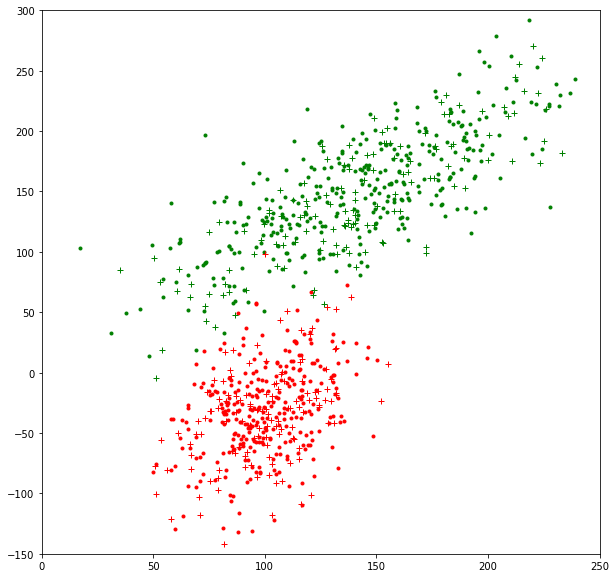

In [1]:
import numpy as np
from matplotlib import pyplot as plt


l1= 300
l2= 350


x1=np.random.normal(100, 20, l1)
y1=np.random.normal(150, 50, l1)
theta1=-np.pi/4.
x1t=x1
y1t=x1*np.cos(theta1)+y1*np.sin(theta1)

x2=np.random.normal(50, 40, l2)
y2=np.random.normal(150, 50, l2)
theta2=np.pi/4.
x2t=x2*np.sin(theta2)+y2*np.cos(theta2)
y2t=y2



Testl1= 130
Testl2= 135

Tx1=np.random.normal(100, 20, Testl1)
Ty1=np.random.normal(150, 50, Testl1)
theta1=-np.pi/4.
Tx1t=Tx1
Ty1t=Tx1*np.cos(theta1)+Ty1*np.sin(theta1)

Tx2=np.random.normal(50, 40, Testl2)
Ty2=np.random.normal(150, 50, Testl2)
theta2=np.pi/4.
Tx2t=Tx2*np.sin(theta2)+Ty2*np.cos(theta2)
Ty2t=Ty2


plt.figure(figsize=(10,10))
plt.plot(x1t,y1t,'.r')
plt.plot(x2t,y2t,'.g')
plt.plot(Tx1t,Ty1t,'+r')
plt.plot(Tx2t,Ty2t,'+g')
plt.xlim(0,250)
plt.ylim(-150,300)
plt.show()



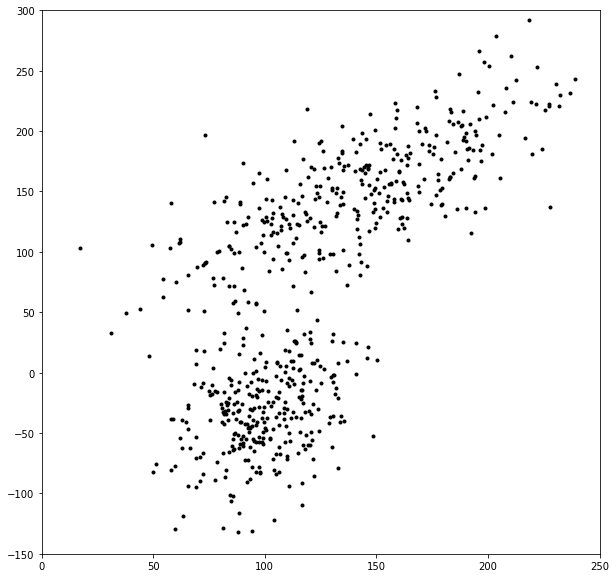

In [2]:
xt=np.concatenate([x1t,x2t])
yt=np.concatenate([y1t,y2t])

plt.figure(figsize=(10,10))
plt.plot(xt,yt,'.k')
plt.xlim(0,250)
plt.ylim(-150,300)
plt.show()

In [3]:
from sklearn.cluster import KMeans as KM

data=np.zeros((l1+l2,2))
data[0:l1,0]=x1t
data[0:l1,1]=y1t
data[l1:l1+l2,0]=x2t
data[l1:l1+l2,1]=y2t

data_label=np.zeros((l1+l2))
data_label[0:l1]=0
data_label[l1:l1+l2]=1

test=np.zeros((Testl1+Testl2,2))
test[0:Testl1,0]=Tx1t
test[0:Testl1,1]=Ty1t
test[Testl1:Testl1+Testl2,0]=Tx2t
test[Testl1:Testl1+Testl2,1]=Ty2t

test_label=np.zeros((Testl1+Testl2))
test_label[0:Testl1]=0
test_label[Testl1:Testl1+Testl2]=1

In [4]:
# fit a K-Means Model with two components
neigh = KM(n_clusters=2, random_state=0)
neigh.fit(data)

#score = neigh.score(test, test_label)
score = neigh.score(data, data_label)
print(score)

-1999242.4162326737


3.3846153846153846


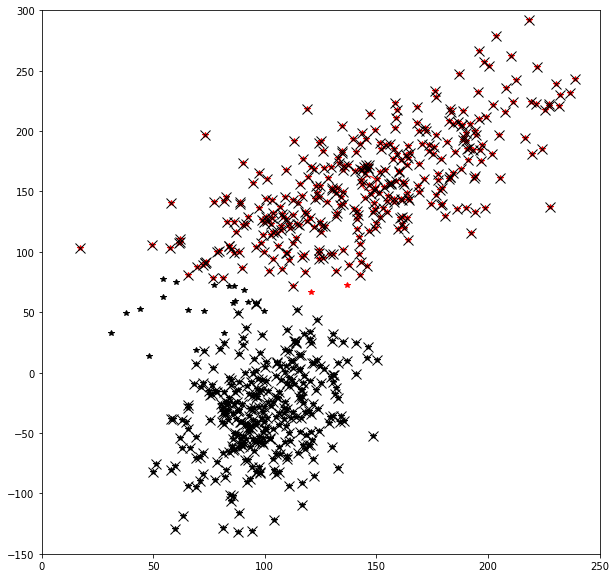

In [5]:
data_label_pred = neigh.predict(data)
train_accuracy = np.mean(data_label_pred.ravel() == data_label.ravel()) * 100.
print(train_accuracy)

first=np.where(data_label_pred==0)
firstX=data[first,0]
firstY=data[first,1]
Ax=np.mean(firstX)
Ay=np.mean(firstY)


second=np.where(data_label_pred==1)
secondX=data[second,0]
secondY=data[second,1]
Bx=np.mean(secondX)
By=np.mean(secondY)

err=np.where(data_label_pred != data_label)
errX=data[err,0]
errY=data[err,1]

plt.figure(figsize=(10,10))
plt.plot(firstX, firstY, '*r')
plt.scatter(Ax, Ay, s=200, facecolors='none', edgecolors='r')

plt.plot(secondX, secondY, '*k')
plt.scatter(Bx, By, s=200, facecolors='none', edgecolors='k')

plt.plot(errX, errY, 'xk', markersize=10)
plt.xlim(0,250)
plt.ylim(-150,300)
plt.show()


7.547169811320755


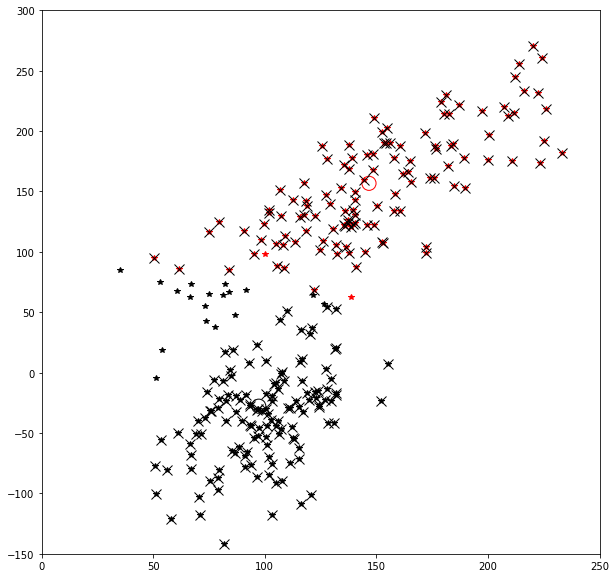

In [6]:
test_label_pred = neigh.predict(test)
test_accuracy = np.mean(test_label_pred == test_label) * 100.
print(test_accuracy)

first=np.where(test_label_pred==0)
firstX=test[first,0]
firstY=test[first,1]

second=np.where(test_label_pred==1)
secondX=test[second,0]
secondY=test[second,1]

err=np.where(test_label_pred != test_label)
errX=test[err,0]
errY=test[err,1]

plt.figure(figsize=(10,10))
plt.plot(firstX, firstY, '*r')
plt.plot(secondX, secondY, '*k')
plt.plot(errX, errY, 'xk', markersize=10)
plt.scatter(Ax, Ay, s=200, facecolors='none', edgecolors='r')
plt.scatter(Bx, By, s=200, facecolors='none', edgecolors='k')
plt.xlim(0,250)
plt.ylim(-150,300)
plt.show()